# Modelo predictivo llamadas Contact Center
## Notebook 4 - Modelos de regresión

## Importacion de librerias 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

pd.options.display.max_columns = None

## Carga de datos

In [2]:
df_data = pd.read_pickle('./data/df_data')

In [3]:
df_data.head()

,Fecha,Monday,Tuesday,Wednesday,Thursday,Friday,envioslag1,envioslag6,envioslag7,envioslag8,envios,sinlag1,coslag1,sinlag2,coslag2,sinlag3,coslag3,sinlag4,coslag4,sinlag5,coslag5,sinlag6,coslag6,sinlag7,coslag7,llamadaslag1,llamadaslag2,llamadaslag3,llamadaslag4,llamadaslag5,llamadaslag6,llamadaslag7,llamadas
0,2019-01-14,1.0,0.0,0.0,0.0,0.0,23.0,3220.0,1408.0,1923.0,3237.0,3.921346e-15,1.0,-1.960673e-15,-1.0,8.660254e-01,-0.5,1.000000e+00,-9.803364e-16,-5.877853e-01,-0.809017,8.660254e-01,0.5,-7.818315e-01,0.623490,270.0,236.0,227.0,174.0,173.0,351.0,283.0,260.0
1,2019-01-15,0.0,1.0,0.0,0.0,0.0,3237.0,4595.0,3220.0,1408.0,2911.0,-3.429011e-15,1.0,-1.714506e-15,1.0,-8.660254e-01,-0.5,8.572528e-16,-1.000000e+00,-9.510565e-01,0.309017,8.660254e-01,-0.5,-4.898587e-16,1.000000,260.0,270.0,236.0,227.0,174.0,173.0,351.0,259.0
2,2019-01-16,0.0,0.0,1.0,0.0,0.0,2911.0,2924.0,4595.0,3220.0,2639.0,-1.077937e-14,1.0,5.389684e-15,-1.0,-4.777360e-15,1.0,-1.000000e+00,-2.694842e-15,-7.347881e-16,1.000000,2.388680e-15,-1.0,7.818315e-01,0.623490,259.0,260.0,270.0,236.0,227.0,174.0,173.0,227.0
3,2019-01-17,0.0,0.0,0.0,1.0,0.0,2639.0,289.0,2924.0,4595.0,2056.0,-3.918870e-15,1.0,-1.959435e-15,1.0,8.660254e-01,-0.5,-9.797174e-16,1.000000e+00,9.510565e-01,0.309017,-8.660254e-01,-0.5,9.749279e-01,-0.222521,227.0,259.0,260.0,270.0,236.0,227.0,174.0,142.0
4,2019-01-18,0.0,0.0,0.0,0.0,1.0,2056.0,2461.0,289.0,2924.0,2005.0,2.941628e-15,1.0,-1.470814e-15,-1.0,-8.660254e-01,-0.5,1.000000e+00,-7.354071e-16,5.877853e-01,-0.809017,-8.660254e-01,0.5,4.338837e-01,-0.900969,142.0,227.0,259.0,260.0,270.0,236.0,227.0,277.0


# Tratamiento de la serie temporal con ML

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [5]:
X = df_data.iloc[:,1:-1]
y = df_data['llamadas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
result = pd.DataFrame()
result['y_test'] = y_test

In [7]:
X_train.columns

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'envioslag1',
       'envioslag6', 'envioslag7', 'envioslag8', 'envios', 'sinlag1',
       'coslag1', 'sinlag2', 'coslag2', 'sinlag3', 'coslag3', 'sinlag4',
       'coslag4', 'sinlag5', 'coslag5', 'sinlag6', 'coslag6', 'sinlag7',
       'coslag7', 'llamadaslag1', 'llamadaslag2', 'llamadaslag3',
       'llamadaslag4', 'llamadaslag5', 'llamadaslag6', 'llamadaslag7'],
      dtype='object')

In [8]:
X_test.columns

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'envioslag1',
       'envioslag6', 'envioslag7', 'envioslag8', 'envios', 'sinlag1',
       'coslag1', 'sinlag2', 'coslag2', 'sinlag3', 'coslag3', 'sinlag4',
       'coslag4', 'sinlag5', 'coslag5', 'sinlag6', 'coslag6', 'sinlag7',
       'coslag7', 'llamadaslag1', 'llamadaslag2', 'llamadaslag3',
       'llamadaslag4', 'llamadaslag5', 'llamadaslag6', 'llamadaslag7'],
      dtype='object')

### Normalizamos los datos

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

## y_train = np.log1p(y_train)
## y_test = np.log1p(y_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X = scaler.transform(X)

#### Guardar normalizador

In [11]:
# Volvado a disco del modelo con pickle
scaler_pkl_filename = 'data/scaler.pkl'
# Abrimos fichero
scaler_pkl = open(scaler_pkl_filename, 'wb')
pickle.dump(scaler, scaler_pkl)
# Cerramos fichero
scaler_pkl.close()

## Regresión Lineal

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
# Regresor
regl = LinearRegression()

In [14]:
regl.fit(X_train, y_train)

LinearRegression()

In [15]:
pred_regl = regl.predict(X_test)

#### Guardar modelo entrenado

In [16]:
# Volvado a disco del modelo con pickle
regl_pkl_filename = 'data/regl.pkl'
# Abrimos fichero
regl_pkl_model = open(regl_pkl_filename, 'wb')
pickle.dump(regl, regl_pkl_model)
# Cerramos fichero
regl_pkl_model.close()

### Resultados regresión lineal

In [17]:
rmse_regl = mean_squared_error(y_test, pred_regl, squared=False)
print(rmse_regl)

40.89368212353375


In [18]:
result['pred_regl'] = pred_regl

In [19]:
result['error_regl'] = result['y_test'] - result['pred_regl']

In [20]:
result['regl_MSE'] = rmse_regl

In [21]:
result.head()

,y_test,pred_regl,error_regl,regl_MSE
311,259.0,146.130490,112.869510,40.893682
218,184.0,190.526740,-6.526740,40.893682
16,164.0,176.699618,-12.699618,40.893682
11,141.0,183.820897,-42.820897,40.893682
77,293.0,302.976195,-9.976195,40.893682


##### Distribución de los errores

<AxesSubplot:>

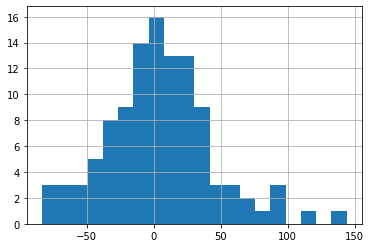

In [22]:
result['error_regl'].hist(bins=20)

In [23]:
result['error_regl'].describe()

count    110.000000
mean       4.566448
std       40.823910
min      -83.151458
25%      -22.081280
50%        3.116583
75%       25.758692
max      143.972497
Name: error_regl, dtype: float64

#### Representar modelo de predicción

In [24]:
'''analisisX = df_data.iloc[:,-1].reset_index()
analisisX = analisisX['llamadas']'''

analisisRegl = regl.predict(X)
analisisRegl = pd.DataFrame(analisisRegl)

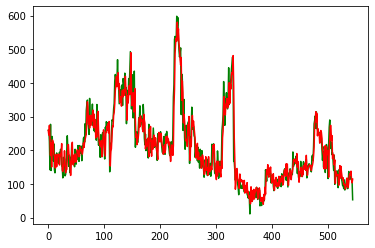

In [25]:
plt.plot(y, c='green')
plt.plot(analisisRegl, c='red')

# Cross-Val-Score REGLINEAL

In [26]:
lin_score = cross_val_score(regl, X_train, y_train, cv=100, scoring = 'neg_mean_squared_error')
lin_score_n = -lin_score
cvs_regl = np.mean(np.sqrt(lin_score_n))
result['cvs_regl'] = cvs_regl
print(cvs_regl)

35.62505071163924


## K-vecinos

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

#### Buscamos el mejor ajuste del modelo de K-vecinos

In [28]:
reg_gs = GridSearchCV(KNeighborsRegressor(),
                        param_grid={"n_neighbors":np.arange(1,50)})

In [29]:
reg_gs.fit(X,y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [30]:
reg_gs.best_params_, reg_gs.best_score_

({'n_neighbors': 13}, 0.2017247434197861)

In [31]:
# Regresor
regk = KNeighborsRegressor(n_neighbors=17)

In [32]:
regk.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=17)

In [33]:
pred_regk = regk.predict(X_test)

### Resultados K-vecinos

In [34]:
rmse_regk = mean_squared_error(y_test, pred_regk, squared=False)
print(rmse_regk)

49.07471529882674


In [35]:
result['pred_regk'] = pred_regk

In [36]:
result['error_regk'] = result['y_test'] - result['pred_regk']

In [37]:
result['regk_MSE'] = rmse_regk

In [38]:
result.head()

,y_test,pred_regl,error_regl,regl_MSE,cvs_regl,pred_regk,error_regk,regk_MSE
311,259.0,146.130490,112.869510,40.893682,35.625051,159.235294,99.764706,49.074715
218,184.0,190.526740,-6.526740,40.893682,35.625051,218.941176,-34.941176,49.074715
16,164.0,176.699618,-12.699618,40.893682,35.625051,176.882353,-12.882353,49.074715
11,141.0,183.820897,-42.820897,40.893682,35.625051,180.764706,-39.764706,49.074715
77,293.0,302.976195,-9.976195,40.893682,35.625051,280.235294,12.764706,49.074715


##### Distribución de los errores

<AxesSubplot:>

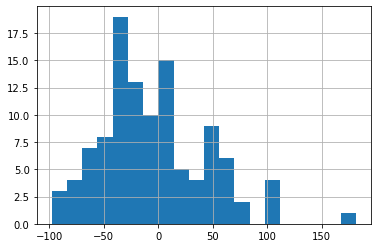

In [39]:
result['error_regk'].hist(bins=20)

In [40]:
result['error_regk'].describe()

count    110.000000
mean      -4.579144
std       49.084229
min      -97.823529
25%      -38.882353
50%      -12.588235
75%       22.573529
max      181.823529
Name: error_regk, dtype: float64

#### Representar modelo de predicción

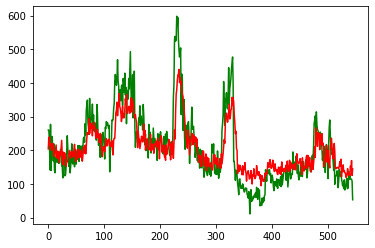

In [41]:
analisisRegk = regk.predict(X)
analisisRegk = pd.DataFrame(analisisRegk)

plt.plot(y, c='green')
plt.plot(analisisRegk, c='red')

# Cross-Val-Score K-Vecinos

In [42]:
lin_score = cross_val_score(regk, X_train, y_train, cv=100, scoring = 'neg_mean_squared_error')
lin_score_n = -lin_score
cvs_regk = np.mean(np.sqrt(lin_score_n))
result['cvs_regk'] = cvs_regk
print(cvs_regk)

59.323188816927285


## XGBoost

In [43]:
import xgboost as xgb

In [44]:
# Regresor
regXGB = xgb.XGBRegressor()

In [45]:
regXGB.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
pred_regXGB = regXGB.predict(X_test)

### Resultados XGBoost

In [47]:
rmse_regXGB = mean_squared_error(y_test, pred_regXGB, squared=False)
print(rmse_regXGB)

42.74195815073856


In [48]:
result['pred_regXGB'] = pred_regXGB

In [49]:
result['error_regXGB'] = result['y_test'] - result['pred_regXGB']

In [50]:
result['regXGB_MSE'] = rmse_regXGB

In [51]:
result.head()

,y_test,pred_regl,error_regl,regl_MSE,cvs_regl,pred_regk,error_regk,regk_MSE,cvs_regk,pred_regXGB,error_regXGB,regXGB_MSE
311,259.0,146.130490,112.869510,40.893682,35.625051,159.235294,99.764706,49.074715,59.323189,137.561157,121.438843,42.741958
218,184.0,190.526740,-6.526740,40.893682,35.625051,218.941176,-34.941176,49.074715,59.323189,215.302582,-31.302582,42.741958
16,164.0,176.699618,-12.699618,40.893682,35.625051,176.882353,-12.882353,49.074715,59.323189,170.074966,-6.074966,42.741958
11,141.0,183.820897,-42.820897,40.893682,35.625051,180.764706,-39.764706,49.074715,59.323189,188.926376,-47.926376,42.741958
77,293.0,302.976195,-9.976195,40.893682,35.625051,280.235294,12.764706,49.074715,59.323189,305.207367,-12.207367,42.741958


##### Distribución de los errores

<AxesSubplot:>

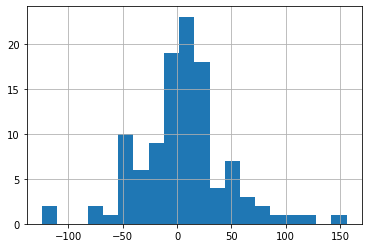

In [52]:
result['error_regXGB'].hist(bins=20)

In [53]:
result['error_regXGB'].describe()

count    110.000000
mean       4.841513
std       42.661224
min     -124.206360
25%      -15.442101
50%        5.021896
75%       24.125557
max      156.048309
Name: error_regXGB, dtype: float64

#### Representar modelo de predicción

In [54]:
'''analisisX = df_data.iloc[:,-1].reset_index()
analisisX = analisisX['llamadas']'''

analisisRegXGB = regXGB.predict(X)
analisisRegXGB = pd.DataFrame(analisisRegXGB)

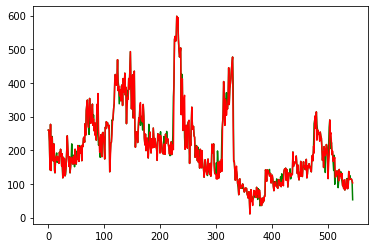

In [55]:
plt.plot(y, c='green')
plt.plot(analisisRegXGB, c='red')

# Cross-Val-Score XGBoost

In [56]:
lin_score = cross_val_score(regXGB, X_train, y_train, cv=100, scoring = 'neg_mean_squared_error')
lin_score_n = -lin_score
cvs_regXGB = np.mean(np.sqrt(lin_score_n))
result['cvs_regXGB'] = cvs_regXGB
print(cvs_regXGB)

39.839146544128965


## Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
# Regresor
regRF = RandomForestRegressor(n_estimators=20)

In [59]:
regRF.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20)

In [60]:
pred_regRF = regRF.predict(X_test)

### Resultados Random Forest

In [61]:
rmse_regRF = mean_squared_error(y_test, pred_regRF, squared=False)
print(rmse_regRF)

39.03633854849513


In [62]:
result['pred_regRF'] = pred_regRF

In [63]:
result['error_regRF'] = result['y_test'] - result['pred_regRF']

In [64]:
result['regRF_MSE'] = rmse_regRF

In [65]:
result.head()

,y_test,pred_regl,error_regl,regl_MSE,cvs_regl,pred_regk,error_regk,regk_MSE,cvs_regk,pred_regXGB,error_regXGB,regXGB_MSE,cvs_regXGB,pred_regRF,error_regRF,regRF_MSE
311,259.0,146.130490,112.869510,40.893682,35.625051,159.235294,99.764706,49.074715,59.323189,137.561157,121.438843,42.741958,39.839147,147.25,111.75,39.036339
218,184.0,190.526740,-6.526740,40.893682,35.625051,218.941176,-34.941176,49.074715,59.323189,215.302582,-31.302582,42.741958,39.839147,202.70,-18.70,39.036339
16,164.0,176.699618,-12.699618,40.893682,35.625051,176.882353,-12.882353,49.074715,59.323189,170.074966,-6.074966,42.741958,39.839147,183.40,-19.40,39.036339
11,141.0,183.820897,-42.820897,40.893682,35.625051,180.764706,-39.764706,49.074715,59.323189,188.926376,-47.926376,42.741958,39.839147,190.20,-49.20,39.036339
77,293.0,302.976195,-9.976195,40.893682,35.625051,280.235294,12.764706,49.074715,59.323189,305.207367,-12.207367,42.741958,39.839147,279.05,13.95,39.036339


##### Distribución de los errores

<AxesSubplot:>

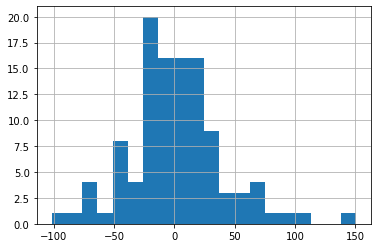

In [66]:
result['error_regRF'].hist(bins=20)

In [67]:
result['error_regRF'].describe()

count    110.000000
mean       1.424545
std       39.188875
min     -101.600000
25%      -19.225000
50%       -0.625000
75%       19.325000
max      150.850000
Name: error_regRF, dtype: float64

#### Representar modelo de predicción

In [68]:
'''analisisX = df_data.iloc[:,-1].reset_index()
analisisX = analisisX['llamadas']'''

analisisregRF = regRF.predict(X)
analisisregRF = pd.DataFrame(analisisregRF)

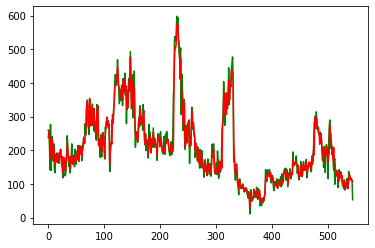

In [69]:
plt.plot(y, c='green')
plt.plot(analisisregRF, c='red')

# Cross-Val-Score Random Forest

In [70]:
lin_score = cross_val_score(regRF, X_train, y_train, cv=100, scoring = 'neg_mean_squared_error')
lin_score_n = -lin_score
cvs_regRF = np.mean(np.sqrt(lin_score_n))
result['cvs_regRF'] = cvs_regRF
print(cvs_regRF)

37.47538197354257


## ARIMA

#### Comprobar estacionalidad

In [71]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [72]:
adf_test(y)

1. ADF :  -2.974966475504673
2. P-Value :  0.03729927680264395
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 543
5. Critical Values :
	 1% :  -3.442450336733213
	 5% :  -2.8668774460774498
	 10% :  -2.5696126760816553


### Evaluar modelos ARIMA

In [73]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [74]:
arima_fit = auto_arima(y, trace=True,
                          suppress_warnings=True)
arima_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5571.400, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5621.456, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5581.160, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5571.515, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5619.501, Time=0.00 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5573.906, Time=0.25 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5570.774, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5573.413, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5568.966, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5570.647, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5572.134, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5567.052, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5579.229, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=5568.732, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  546
Model:               SARIMAX(2, 1, 0)   Log Likelihood               -2780.526
Date:                Thu, 15 Sep 2022   AIC                           5567.052
Time:                        09:59:53   BIC                           5579.954
Sample:                             0   HQIC                          5572.096
                                - 546                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3174      0.030    -10.734      0.000      -0.375      -0.259
ar.L2         -0.1603      0.033     -4.827      0.000      -0.225      -0.095
sigma2      1584.6875     54.165     29.257      0.000    1478.527    1690.848
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               520.24
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Aplicamos modelo SARIMAX (2,1,0)

In [75]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [76]:
print(df_data.shape)
print(df_data.shape)

(546, 33)
(546, 33)


In [77]:
i, m = X.shape

to_train = int(i*0.8)
to_test = i - to_train

print(to_train, to_test)
print(to_train+to_test)

436 110
546


In [78]:
X_train, y_train = df_data.iloc[:to_train, ((df_data.columns != 'Fecha') & (df_data.columns != 'llamadas'))], df_data['llamadas'][:to_train]
X_test, y_test = df_data.iloc[-to_test:, ((df_data.columns != 'Fecha') & (df_data.columns != 'llamadas'))], df_data['llamadas'][-to_test:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(436, 31) (436,)
(110, 31) (110,)


#### Normalizamos los datos

In [79]:
from sklearn.preprocessing import StandardScaler

In [80]:
scaler = StandardScaler()

y_train = np.log1p(y_train)
## y_test = np.log1p(y_test)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Entrenamos el modelo

In [81]:
regSARIMAX = SARIMAX(y_train, order=(2,1,0), exog=X_train)
regSARIMAX = regSARIMAX.fit()
regSARIMAX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               llamadas   No. Observations:                  436
Model:               SARIMAX(2, 1, 0)   Log Likelihood                  85.616
Date:                Thu, 15 Sep 2022   AIC                           -103.233
Time:                        09:59:56   BIC                             35.329
Sample:                             0   HQIC                           -48.545
                                - 436                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0102      0.019     -0.526      0.599      -0.048       0.028
x2            -0.0138      0.018     -0.769      0.442      -0.049       0.021
x3             0.0096      0.012      0.827      0.408      -0.013       0.032
x4            -0.0085      0.017     -0.489      0.625      -0.042       0.025
x5             0.0102      0.022      0.467      0.641      -0.033       0.053
x6            -0.0042      0.013     -0.331      0.740      -0.029       0.021
x7             0.0102      0.012      0.863      0.388      -0.013       0.033
x8            -0.0093      0.012     -0.798      0.425      -0.032       0.014
x9             0.0198      0.010      1.888      0.059      -0.001       0.040
x10           -0.0044      0.012     -0.366      0.714      -0.028       0.019
x11           -0.0006      0.010     -0.061      0.951      -0.021       0.020
const       -3.68e-17   2.22e-12  -1.66e-05      1.000   -4.36e-12    4.36e-12
x12           -0.0152      0.013     -1.131      0.258      -0.041       0.011
x13           -0.0044      0.012     -0.367      0.714      -0.028       0.019
x14            0.0055      0.010      0.573      0.566      -0.013       0.024
x15            0.0138      0.010      1.338      0.181      -0.006       0.034
x16            0.0063      0.010      0.635      0.526      -0.013       0.026
x17           -0.0053      0.010     -0.508      0.611      -0.026       0.015
x18            0.0084      0.010      0.833      0.405      -0.011       0.028
x19           -0.0114      0.010     -1.126      0.260      -0.031       0.008
x20            0.0130      0.009      1.387      0.165      -0.005       0.031
x21           -0.0130      0.010     -1.288      0.198      -0.033       0.007
x22            0.0179      0.037      0.484      0.629      -0.055       0.090
x23           -0.0090      0.019     -0.471      0.638      -0.046       0.028
x24            0.1283      0.037      3.470      0.001       0.056       0.201
x25           -0.0136      0.048     -0.281      0.779      -0.109       0.081
x26           -0.0071      0.041     -0.174      0.862      -0.087       0.073
x27            0.0131      0.040      0.329      0.742      -0.065       0.091
x28           -0.0578      0.039     -1.501      0.133      -0.133       0.018
x29            0.0192      0.037      0.512      0.609      -0.054       0.093
x30            0.0418      0.036      1.166      0.244      -0.028       0.112
ar.L1         -0.6263      0.047    -13.222      0.000      -0.719      -0.533
ar.L2         -0.2793      0.067     -4.145      0.000      -0.411      -0.147
sigma2         0.0395      0.002     19.546      0.000       0.035       0.043
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              2006.33
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               2.46   Skew:                

<AxesSubplot:>

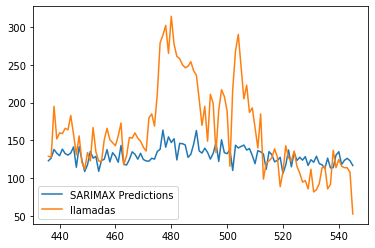

In [82]:
start = len(X_train)
end = len(X_train)+len(X_test)-1

pred_regSARIMAX = regSARIMAX.predict(start=start, end=end, exog=X_test, typ='levels').rename('SARIMAX Predictions')
pred_regSARIMAX = pred_regSARIMAX.apply(lambda x: 0 if x < 0 else x )

pred_regSARIMAX = np.expm1(pred_regSARIMAX)

pred_regSARIMAX.plot(legend=True)
y_test.plot(legend=True)

#### Resultados SARIMAX

In [83]:
rmse_regSARIMAX = mean_squared_error(y_test, pred_regSARIMAX, squared=False)
print(rmse_regSARIMAX)

59.53064615855102


In [84]:
resultSARIMAX = pd.DataFrame(y_test, columns=['llamadas'])
resultSARIMAX['pred_regSARIMAX'] = pred_regSARIMAX
resultSARIMAX['error_regSARIMAX'] = resultSARIMAX.llamadas - resultSARIMAX.pred_regSARIMAX
resultSARIMAX['regSARIMAX_MSE'] = rmse_regSARIMAX
resultSARIMAX.head()

,llamadas,pred_regSARIMAX,error_regSARIMAX,regSARIMAX_MSE
436,129.0,123.161818,5.838182,59.530646
437,128.0,126.821396,1.178604,59.530646
438,195.0,138.085977,56.914023,59.530646
439,152.0,133.208154,18.791846,59.530646
440,160.0,129.818556,30.181444,59.530646


In [85]:
resultSARIMAX['error_regSARIMAX'].describe()

count    110.000000
mean      32.553158
std       50.069756
min      -63.863670
25%       -2.054144
50%       18.405021
75%       60.461466
max      166.783086
Name: error_regSARIMAX, dtype: float64

##### Distribución de los errores

<AxesSubplot:>

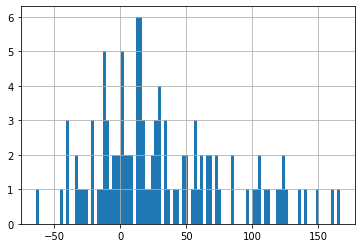

In [86]:
resultSARIMAX['error_regSARIMAX'].hist(bins=100)

# Comparacion de modelos

In [87]:
models = {'modelo': ['Reg. Lineal', 'Kvecinos', 'XGBoost', 'Random Forest', 'SARIMAX'],
          'MSE': [result.head(1).iloc[0,3], result.head(1).iloc[0,7], result.head(1).iloc[0,11], result.head(1).iloc[0,15], resultSARIMAX.head(1).iloc[0,3]],
          'CVS': [result.head(1).iloc[0,4], result.head(1).iloc[0,8], result.head(1).iloc[0,12], result.head(1).iloc[0,16], resultSARIMAX.head(1).iloc[0,3]]
         }

In [88]:
vsModels = pd.DataFrame.from_dict(models)

In [89]:
vsModels.set_index('modelo', inplace=True)

In [90]:
vsModels.sort_values(by='CVS')

,MSE,CVS
modelo,,
Reg. Lineal,40.893682,35.625051
Random Forest,39.036339,37.475382
XGBoost,42.741958,39.839147
Kvecinos,49.074715,59.323189
SARIMAX,59.530646,59.530646
